# <center> Python for Data Analysis: Numpy</center>

## Table of Contents
[Numpy Basics: Arrays and Vectorized Computation](#Numpy-Basics:-Arrays-and-Vectorized-Computation)
* [1.1 The NumPy Array: A Multidimensional Array Object](#1.1-The-NumPy-Array:-A-Multidimensional-Array-Object)
    * [Creating ndarrays](#Creating-ndarrays)
    * [Data Types for ndarrays](#Data-Types-for-ndarrays)
    * [Arithmetic with NumPy Arrays](#Arithmetic-with-NumPy-Arrays)
    * [Basic Indexing and Slicing](#Basic-Indexing-and-Slicing)
    * [Indexing with slices](#Indexing-with-slices)
    * [Boolean Indexing](#Boolean-Indexing)
    * [Fancy Indexing](#Fancy-Indexing)
    * [Transposing Arrays and Swapping Axes](#Transposing-Arrays-and-Swapping-Axes)
* [1.2 Universal Functions: Fast Element - Wise Array Functions](#1.2-Universal-Functions:-Fast-Element---Wise-Array-Functions)
* [1.3 Array-Oriented Programming with Arrays](#1.3-Array-Oriented-Programming-with-Arrays)
    * [Expressing Conditional Logic Array Operations](#Expressing-Conditional-Logic-Array-Operations)
    * [Mathematical and Statistical Methods](#Mathematical-and-Statistical-Methods)
    * [Methods for Boolean Arrays](#Methods-for-Boolean-Arrays)
    * [Sorting](#Sorting)
    * [Unique and Other Set Logic](#Unique-and-Other-Set-Logic)
* [1.4 File Input and Output with Arrays](#1.4-File-Input-and-Output-with-Arrays)
* [1.5 Linear Algebra](#1.5-Linear-Algebra)
    * [Concatenating and Splitting Arrays](#Concatenating-and-Splitting-Arrays)
* [1.6 Pseudorandom Number Generation](#1.6-Pseudorandom-Number-Generation)
* [1.7 Example: Random Walks](#1.7-Example:-Random-Walks)

## Numpy Basics: Arrays and Vectorized Computation<a class="anchor" id="Numpy Basics: Arrays and Vectorized Computation"></a>

NumPy short for Numerical Python is one of the most important packages for numerical computing in Python. 
Most computational packages providing scientific functionality us NumPy's array object as the *lingua franca* for data exchange.

To give you an idea of the performance difference, consider a Numpy array of one million integers, and the equivalent Python List

In [1]:
import numpy as np

In [3]:
my_array=np.arange(1000000)
my_list = list(range(1000000))

#Now lets multiply each sequence by 2
%time for _ in range(10): my_array2 = my_array * 2
%time for _ in range(10): my_list2 = [x*2 for x in my_list]

#%time is a magic command that report the execution time of a single statement

Wall time: 17 ms
Wall time: 996 ms


Numpy-based algorithms are generally 10 to 100 times faster (or more) than their pure python counterparts and use significantly less memory

## 1.1 The NumPy Array: A Multidimensional Array Object<a class="anchor" id="The NumPy Array: A Multidimensional Array Object"></a>

One of the key features of NumPy is its N-dimensional array object, or ndarray, which is a fast, flexible container for a large datasets in Python. Arrays enable you to perform mathematical operations on whole blocks of data using similar syntax to the equivalent operations betwee scalar elements.

In [8]:
#Generate some random data
data = np.random.randn(2,3)
data

#Write mathematical oepartions with data:
data * 10
data + data

array([[ 0.46479506, -1.23577813, -0.06445202],
       [ 0.51710734, -1.82964987,  0.82523644]])

In a ndarray all of the elements must be the same type 

In [9]:
# shape indicates the size of each dimension
data.shape

(2, 3)

In [10]:
## dtype describes the data type of the array
data.dtype

dtype('float64')

### Creating ndarrays<a class="anchor" id="Creating ndarrays"></a>

The easiest way to create an array is to use the **array** function 

In [11]:
data1 = [6, 7.5, 8, 0 ,1]
arr = np.array(data1)
arr

array([6. , 7.5, 8. , 0. , 1. ])

In [14]:
# nested sequences, like a list of lists, will be converted into a 
# multidimensional array
data2 = [[1, 2, 3, 4],[5, 6, 7, 8]]
arr2 = np.array(data2)
arr2.shape

(2, 4)

There are other functions for creating new arrays. As example **zeros** and **ones** create arrays of 0s or 1s. **empty** creates anarray without initializing its values to any particular value.

In [15]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [16]:
#to create a higher dimensional array with th ese method , pass a tuple for the shape
np.zeros((3,6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [17]:
np.empty((2,3,2)) #np.empty not always return an array of zeros

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

**arange** is an array-valued version of the built-in Python *range* function

In [18]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

### Data Types for ndarrays<a class="anchor" id="Data Types for ndarrays"></a>

The *data type* or **dtype** is a special object containing the information (or metadata, data about data) the ndarray needs to interpret a chunk memory as a particular type of data: 

In [21]:
arr1 = np.array([1, 2, 3], dtype = np.float64)
arr2 = np.array([1, 2, 3], dtype = np.int32)

#The nuemrical dtypes are named the same way: a type name, like float or int
#followed by a number indicating the number ofbits per element
#this is to have control on how data are stored in memory and on disk, especially in large datasets
arr1.dtype, arr2.dtype

(dtype('float64'), dtype('int32'))

Convert or cast an array form one dtype to another using ndarray's **astype** method: 

In [22]:
#Integers cast to floating point
arr = np.array([1, 2, 3, 4, 5])
arr.dtype

dtype('int32')

In [24]:
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

If you have an array of strings representing numbers, you can use **astype** to convert them to numeric form

In [35]:
num_string=np.array(['1.25','-9.6','42'], dtype=np.string_)
num_string.astype(float)

array([ 1.25, -9.6 , 42.  ])

### Arithmetic with NumPy Arrays<a class="anchor" id="Arithmetic with NumPy Arrays"></a>

Arrays are important because they enable ypu to express bath opertaions on data without writing any for loops (*vectorization*). Any arithmetic operations between equal-size arrays applies to operation element-wise:

In [36]:
arr = np.array([[1, 2, 3],[4, 5, 6]])
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [37]:
arr * arr #element-wise multiplication

array([[ 1,  4,  9],
       [16, 25, 36]])

In [38]:
arr - arr #element-wise difference

array([[0, 0, 0],
       [0, 0, 0]])

Arithmetic operations with scalars propagate the scalar argument to each element in the array

In [39]:
1/arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [40]:
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

Perform comparations between arrays of the same size yield boolean arrays:

In [41]:
arr2 = np.array([[0., 4., 1.],[7., 2., 12.]])
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [42]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

Operations between differently sized arrays is called *broadcasting* 

### Basic Indexing and Slicing<a class="anchor" id="Basic Indexing and Slicing"></a>

There are many ways to select a subset of your data or individual elements. 

In [44]:
#one-dimensional array are simple; on the surface they act similarly as Python lists
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [45]:
arr[5]

5

In [47]:
arr[5:10]

array([5, 6, 7, 8, 9])

In [48]:
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [50]:
arr[:] # select all the elements on the array
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

An important Python's built-in lists is that array slices are *views* on the original array. This means that data is not copied, and any modifications to the view will be reflected in the source array. If you want a copy of a ndarray instead of a view, you will need to explicity copy the array **.copy()**

In [55]:
#Higher dimensional arrays
arr2=np.array([[1, 2, 3],[4, 5, 6],[7, 8, 9]])
arr2

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [52]:
arr2[2] #give the 3th row

array([7, 8, 9])

In [53]:
arr2[0][2] #row and column

3

In [56]:
arr2[0,2] #pass a comma-separated list 

3

### Indexing with slices<a class="anchor" id="Indexing with slices"></a>

In [59]:
arr2

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [61]:
arr2[:2] #select the first two rows of arr2

array([[1, 2, 3],
       [4, 5, 6]])

In [62]:
arr2[:2,1:]

array([[2, 3],
       [5, 6]])

In [63]:
arr2[1,:2]

array([4, 5])

In [64]:
arr2[:,:1] #colon by itself means to take the entire axis

array([[1],
       [4],
       [7]])

In [67]:
arr2[:2,1:] = 0 #assigning to a slice expression
arr2

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

### Boolean Indexing<a class="anchor" id="Boolean Indexing"></a>

In [68]:
#Some data in an array of names with duplicates
names = np.array(['Bob','Joe','Will','Bob','Will','Joe','Joe'])
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [69]:
data = np.random.randn(7,4) #generate some random normally distributed data 
data

array([[ 0.42000104, -1.21931193, -1.145621  ,  0.5889943 ],
       [ 1.04698075, -0.16979708,  1.19699306,  0.15587776],
       [ 0.48643391, -0.06080228, -1.48384107, -0.66461998],
       [ 2.27014853,  0.39224883, -1.47716841, -0.50186387],
       [ 2.02051326,  0.41773644,  0.82576959,  0.25645296],
       [ 0.01106413, -1.03454339,  1.82307556,  1.30807825],
       [ 0.62319026, -0.23921924,  1.90211214, -0.21307025]])

In [70]:
#select all the rows with corresponding name 'Bob'
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [71]:
#This boolean array can be passed when indexing the array
data[names == 'Bob']

array([[ 0.42000104, -1.21931193, -1.145621  ,  0.5889943 ],
       [ 2.27014853,  0.39224883, -1.47716841, -0.50186387]])

In [72]:
#index the columns
data[names == 'Bob',2:]

array([[-1.145621  ,  0.5889943 ],
       [-1.47716841, -0.50186387]])

In [73]:
data[names == 'Bob',3]

array([ 0.5889943 , -0.50186387])

In [74]:
#select everything except 'Bob'
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True])

In [77]:
data[names!= 'Bob'] # or data[~(names == 'Bob')] (~ is useful when you want to invert)

array([[ 1.04698075, -0.16979708,  1.19699306,  0.15587776],
       [ 0.48643391, -0.06080228, -1.48384107, -0.66461998],
       [ 2.02051326,  0.41773644,  0.82576959,  0.25645296],
       [ 0.01106413, -1.03454339,  1.82307556,  1.30807825],
       [ 0.62319026, -0.23921924,  1.90211214, -0.21307025]])

In [78]:
# selecting two of the three names to combine multiple boolean conditions
#use operants like &(and) ; !(or),keywords dont work with boolena arrays
mask = (names == 'Bob') | (names == 'Will')
data[mask]

array([[ 0.42000104, -1.21931193, -1.145621  ,  0.5889943 ],
       [ 0.48643391, -0.06080228, -1.48384107, -0.66461998],
       [ 2.27014853,  0.39224883, -1.47716841, -0.50186387],
       [ 2.02051326,  0.41773644,  0.82576959,  0.25645296]])

In [79]:
#Setting values with boolena arrays
mask = data < 0
data[mask] = 0
data

array([[0.42000104, 0.        , 0.        , 0.5889943 ],
       [1.04698075, 0.        , 1.19699306, 0.15587776],
       [0.48643391, 0.        , 0.        , 0.        ],
       [2.27014853, 0.39224883, 0.        , 0.        ],
       [2.02051326, 0.41773644, 0.82576959, 0.25645296],
       [0.01106413, 0.        , 1.82307556, 1.30807825],
       [0.62319026, 0.        , 1.90211214, 0.        ]])

In [80]:
data[names !=  'Joe'] = 7
data

array([[7.        , 7.        , 7.        , 7.        ],
       [1.04698075, 0.        , 1.19699306, 0.15587776],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.01106413, 0.        , 1.82307556, 1.30807825],
       [0.62319026, 0.        , 1.90211214, 0.        ]])

### Fancy Indexing<a class="anchor" id="Fancy Indexing"></a>

Describe indexing using integer arrays

In [90]:
arr = np.empty((8,4)) #an 8 x 4 array
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [87]:
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [88]:
#Select a subset of rows in a particular order
arr[[4, 3, 0 , 6]]
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [93]:
#pass multiple index array
arr = np.arange(32).reshape((8,4)) #reshape method 
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [92]:
arr[[1, 5, 7, 2],[0, 3, 1, 2]]
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

### Transposing Arrays and Swapping Axes<a class="anchor" id="Transposing Arrays and Swapping Axes"></a>

Transposing is a special form of reshaping that similarly return a view

In [94]:
arr = np.arange(15).reshape((3,5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

Arrarys have the **transpose** method and also the special .T attribute

In [95]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

This is very useful when computing the inner matrix product **np.dot**

In [96]:
arr = np.random.randn(6,3)
arr

array([[ 0.05292533, -1.08101198, -0.87745554],
       [-1.18945011, -0.29700652, -1.13887427],
       [ 0.91411177,  0.56770104,  0.13904166],
       [ 0.71784295,  1.53301748,  0.3038138 ],
       [-0.43217927, -0.75473211,  0.197827  ],
       [ 0.15539078, -0.27957741, -2.27445427]])

In [97]:
np.dot(arr.T,arr) #(3x6)*(6x3) = (3x3)

array([[2.9794167 , 2.19820533, 1.21445876],
       [2.19820533, 4.57701093, 2.31805864],
       [1.21445876, 2.31805864, 7.390876  ]])

## 1.2 Universal Functions: Fast Element - Wise Array Functions<a class="anchor" id="1.2 Universal Functions: Fast Element- Wise Array Functions"></a>

A universal function, or *ufunc*, is a function that performs element-wise opeartions on data ndarrays. like **sqrt** or **exp**

In [98]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [99]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [100]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

Other functions such as **add** or **maximun** take two arrays

In [101]:
x = np.random.randn(8)
x

array([-0.00882103,  0.74320202, -0.3265597 ,  0.87313844, -1.74594466,
       -0.08799806, -0.12143123,  0.07052915])

In [103]:
y = np.random.randn(8)
y

array([ 0.55669852, -1.24516716,  0.58030749,  1.2933003 , -0.55777885,
       -0.87305767,  0.10779808, -1.57371818])

In [105]:
np.maximum(x,y) #computed the element-wise maximun of the elements in x and y

array([ 0.55669852,  0.74320202,  0.58030749,  1.2933003 , -0.55777885,
       -0.08799806,  0.10779808,  0.07052915])

The function **modf** return multiple arrays, returns a fractional and integral parts of a floating-point array

In [106]:
arr = np.random.randn(7) * 5
arr

array([ 1.5334262 ,  5.39533013, -4.43376695,  3.15950149,  3.70009173,
        1.4327522 ,  1.24525336])

In [108]:
remainder, whole_part = np.modf(arr)
remainder

array([ 0.5334262 ,  0.39533013, -0.43376695,  0.15950149,  0.70009173,
        0.4327522 ,  0.24525336])

In [109]:
whole_part

array([ 1.,  5., -4.,  3.,  3.,  1.,  1.])

## 1.3 Array-Oriented Programming with Arrays<a class="anchor" id="1.3 Array-Oriented Programming with Arrays"></a>

The practice of replacing explicit loops with array operations will often be faster than their pure python equivalents. (Vectorization)

In [110]:
#Example: evaluate sqrt(x^2 + y^2)
points = np.arange(-5, 5, 0.01) #1000 equally spaced points

The **np.meshgrid** is a function that takes two 1D-arrays and products tow 2D-matrices corresponding to all pairs of (x,y) in the two arrays

In [111]:
xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

Now, evaluating the function is a matter of writing the same expression you would write with two points:

In [112]:
z = np.sqrt(xs**2 + ys**2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Use matplotlib to create a visualization of this two dimensional array

In [113]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

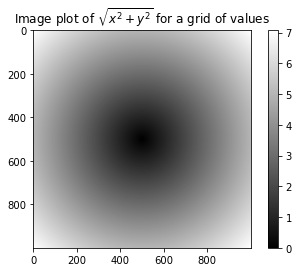

In [115]:
plt.imshow(z,cmap=plt.cm.gray) #create an image plot from two dimensional array
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

### Expressing Conditional Logic Array Operations<a class="anchor" id="Expressing Conditional Logic Array Operations"></a>

The practice of replacing explicit loops with array operations will often be faster than their pure python equivalents. (Vectorization)

The **where** function is a vectorized version of the ternaty expression x if condition else y

In [116]:
xarr = np.array([1.1,1.2,1.3,1.4,1.5])
yarr = np.array([2.1,2.2,2.3,2.4,2.5])
cond = np.array([True,False,True,True,False])

In [118]:
#take a value from xarr whenever the corresponding value in cond is True, and otherwise taje the value from yarr
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

A tipically use of **where** in data analisys is to produce a new array of values based on another array

In [119]:
arr = np.random.randn(4,4)
arr

array([[ 2.20703331, -0.25039681, -0.33270672,  0.10518063],
       [ 0.57489219,  0.01003463, -0.25737048, -0.42637149],
       [ 1.61515974,  0.18122287,  0.44214106,  1.27583119],
       [-0.65033854, -0.99100206, -1.04482082, -0.33522998]])

In [120]:
arr > 0

array([[ True, False, False,  True],
       [ True,  True, False, False],
       [ True,  True,  True,  True],
       [False, False, False, False]])

In [121]:
#replace all positive values with 2 and all negative values with -2
np.where(arr > 0, 2, -2)

array([[ 2, -2, -2,  2],
       [ 2,  2, -2, -2],
       [ 2,  2,  2,  2],
       [-2, -2, -2, -2]])

### Mathematical and Statistical Methods<a class="anchor" id="Mathematical and Statistical Methods"></a>

A set of mathematical functions that compute statistical about an entire or about the data along an axis are accesible as methods of the array class

In [122]:
arr = np.random.randn(5,4)
arr

array([[-0.58946113,  0.69012459,  0.30892958, -0.45281499],
       [ 0.40242489,  0.03911239, -0.26671584,  0.95392399],
       [-2.08354412,  0.79140695,  0.15452758, -0.51150955],
       [ 1.64572058, -0.30066765, -0.25633701,  0.28559219],
       [-0.95680611, -0.32972776,  0.16909762,  0.17955226]])

In [123]:
arr.mean() #or np.mean(arr)

-0.0063585772990396115

In [124]:
arr.sum() #compute sum down the rows

-0.12717154598079222

In [132]:
arr.std() #standard deviation and also variance var()

2.581988897471611

In [133]:
arr.max() #or min

8

In [125]:
#adding axis argument mean and sum computes the statistical over the given axis
arr.mean(axis=1)

array([-0.01080549,  0.28218636, -0.41227979,  0.34357703, -0.234471  ])

In [126]:
arr.sum(axis=0) #compute across columns

array([-1.5816659 ,  0.89024851,  0.10950194,  0.4547439 ])

Other methods like **cumsum** and **cumprod** do not aggregate, instead producing an array of the intermediate results

In [127]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr

array([0, 1, 2, 3, 4, 5, 6, 7])

In [128]:
arr.cumsum() #accumulation

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

In [129]:
# multidimensional array
arr = np.array([[0,1,2],[3,4,5],[6,7,8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [130]:
arr.cumsum(axis=0) #compute cumulative sum over rows

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)

In [131]:
arr.cumprod(axis=1) #compute cumulative prduct over columns

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

### Methods for Boolean Arrays<a class="anchor" id="Methods for Boolean Arrays"></a>

Boolean values ar coerced to 1(True) and 0(False) in the preceding methods.

In [135]:
arr = np.random.randn(100)
(arr>0).sum() #count number of positives values 

52

There are two additional methods, **any** and **all**, useful specially for boolean arrays

In [136]:
bools = np.array([False, False, True, False])
bools.any() #any tests wheter one or more values in an array is True

True

In [137]:
bools.all() #all checks if every value is True

False

### Sorting<a class="anchor" id="Sorting"></a>

NumPy arrays can be sorted in-place with **sort** method

In [139]:
arr = np.random.randn(6)
arr

array([-1.30365247, -0.67924605, -0.42868071,  0.84235551,  0.29940339,
        1.07736367])

In [141]:
arr.sort()
arr

array([-1.30365247, -0.67924605, -0.42868071,  0.29940339,  0.84235551,
        1.07736367])

In [142]:
# With multidimensional array pass axis number to sort
arr = np.random.randn(5,3)
arr

array([[-0.53321484, -0.61288338,  0.43158934],
       [-0.00260521,  0.72379081, -0.10884305],
       [ 0.59182565, -0.1274525 , -0.85462262],
       [-2.48257067, -1.76617088, -0.92486921],
       [ 0.2066793 , -0.83802204, -1.53588527]])

In [144]:
arr.sort(axis=1) # or arr.sort(1)
arr

array([[-0.61288338, -0.53321484,  0.43158934],
       [-0.10884305, -0.00260521,  0.72379081],
       [-0.85462262, -0.1274525 ,  0.59182565],
       [-2.48257067, -1.76617088, -0.92486921],
       [-1.53588527, -0.83802204,  0.2066793 ]])

### Unique and Other Set Logic<a class="anchor" id="Unique and Other Set Logic"></a>

A commonly used operation us **np.unique** which return the sorted unique values in an array

In [145]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [147]:
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [149]:
ints = np.array([3,3,3,2,2,1,1,4,4])
np.unique(ints)

array([1, 2, 3, 4])

Another function is **np.in1d** that test membership of the values in one array in another, returnign a boolean array

In [151]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values,[2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

## 1.4 File Input and Output with Arrays<a class="anchor" id="1.4 File Input and Output with Arrays"></a>

NumPy is able to save and load data to and from disk either in text or binary format. Despite many users prefer pandas for loading tect 

**np.save** and **np.load** are two functions for efficiently saving and loading array data on disk 

In [ ]:
arr = np.arange(10)
np.save('some_array',arr) #this file saves as some_array.npy
np.load('some_array.npy')

## 1.5 Linear Algebra<a class="anchor" id="1.5 Linear Algebra"></a>

Linear algebra, like matrix multiplication, decompositions , determinants, and other square matrix math, is an important part of any array library

In [154]:
x = np.array([[1,2,3],[4,5,6]])
x

array([[1, 2, 3],
       [4, 5, 6]])

In [153]:
y = np.array([[6,23],[-1,7],[8,9]])
y

array([[ 6, 23],
       [-1,  7],
       [ 8,  9]])

In [155]:
#Matrix multiplication
x.dot(y) #np.dot(x,y)  #(2x3)*(3x2)=(2x2)

array([[ 28,  64],
       [ 67, 181]])

The **@** symbol also works as an infix operator that performs matrix multiplication

In [156]:
x @ np.ones(3) #(2x3)*(3x1)=(2x1)

array([ 6., 15.])

**numpy.linalg** has a standard set of matrix decompositoins and things like *inverse* and *determinant*

In [158]:
from numpy.linalg import inv, qr 

In [159]:
X = np.random.randn(5,5)
X

array([[-1.91736029, -2.09496829, -0.04513845, -0.535744  , -1.03758353],
       [-1.34105379, -1.71048231, -0.2111933 ,  0.37969538,  0.24635271],
       [ 1.43327176,  1.11549748, -1.64349056,  2.20032783, -0.13789189],
       [ 0.60411011,  0.37240961, -0.04143397,  0.10762342, -1.02452683],
       [-0.99449497, -1.92027821,  2.00985691, -1.10730864,  0.32379387]])

In [160]:
mat = np.dot(X.T,X)
mat

array([[ 8.88293292, 10.04415224, -4.00962362,  4.83791934,  0.52047428],
       [10.04415224, 12.38513382, -5.2524184 ,  5.09378526,  0.59518664],
       [-4.00962362, -5.2524184 ,  6.78894288, -5.90221567,  0.91466044],
       [ 4.83791934,  5.09378526, -5.90221567,  6.51034801, -0.12279205],
       [ 0.52047428,  0.59518664,  0.91466044, -0.12279205,  2.3107811 ]])

In [161]:
inv(mat) #inverse of a square matrix

array([[ 4130.10607325, -3399.37096375, -3150.42974841, -3246.33084806,
         1019.82660474],
       [-3399.37096375,  2798.05678092,  2593.12797003,  2671.9467375 ,
         -839.46446374],
       [-3150.42974841,  2593.12797003,  2404.07517467,  2477.05528616,
         -778.27676271],
       [-3246.33084806,  2671.9467375 ,  2477.05528616,  2552.52361907,
         -801.85447473],
       [ 1019.82660474,  -839.46446374,  -778.27676271,  -801.85447473,
          252.40042372]])

In [164]:
np.dot(mat,inv(mat))

array([[ 1.00000000e+00,  1.04355211e-12, -2.12867014e-13,
         3.33551768e-12, -6.42824799e-13],
       [ 2.96732990e-12,  1.00000000e+00, -1.71386933e-12,
         2.41435186e-12,  1.18450173e-13],
       [ 8.85173428e-13,  5.34159729e-14,  1.00000000e+00,
         1.69675069e-12, -9.06844975e-13],
       [-1.55943948e-12,  3.30743293e-12,  2.69891134e-13,
         1.00000000e+00,  4.94248823e-13],
       [-7.56262814e-14, -1.02221978e-13, -2.99739705e-13,
         4.13164195e-13,  1.00000000e+00]])

In [166]:
q,r = qr(mat) #QR decomposition
r

array([[-1.48170486e+01, -1.75225869e+01,  9.69645191e+00,
        -1.00719086e+01, -5.09054372e-01],
       [ 0.00000000e+00, -1.06031871e+00,  5.62894271e-01,
         6.75029710e-01,  3.53733226e-01],
       [ 0.00000000e+00,  0.00000000e+00, -5.57579142e+00,
         4.92821811e+00, -1.53731258e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -6.33742231e-01, -2.01716079e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  5.71929457e-04]])

### Concatenating and Splitting Arrays<a class="anchor" id="Concatenating and Splitting Arrays"></a>

**np.concatente** takes a sequence (tuple, list, etc.) of arrays and joints them together in order along the input axis

In [202]:
arr1 = np.array([[1,2,3],[4,5,6]])
arr2 = np.array([[7,8,9],[10,11,12]])
np.concatenate([arr1,arr2],axis=0)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

There are some convenience functions like **vstack** and **hstack**, for common kinds of concatenation

In [204]:
np.vstack((arr1,arr2))

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [205]:
np.hstack((arr1,arr2))

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

**split** on the other hand, slices apart an array into multiple arrays laong an axis

In [206]:
arr = np.random.randn(5,2)
arr

array([[ 1.81953295e+00, -2.26565449e-01],
       [-2.52841466e-02,  1.54577843e-03],
       [ 5.54183271e-01, -7.97764780e-01],
       [ 1.20638547e+00, -2.69623164e-03],
       [-1.26712908e+00, -9.32952954e-01]])

In [207]:
first, second, third = np.split(arr, [1,3]) #the values indicate the indexes at which to split the array into pieces

In [208]:
first

array([[ 1.81953295, -0.22656545]])

In [209]:
second

array([[-0.02528415,  0.00154578],
       [ 0.55418327, -0.79776478]])

In [210]:
third

array([[ 1.20638547, -0.00269623],
       [-1.26712908, -0.93295295]])

## 1.6 Pseudorandom Number Generation<a class="anchor" id="Pseudorandom Number Generation"></a>

**np.random** module suplements the built-in Python *random* with functions for efficiently generating wholw arrays of sample values from many kind of probability distributions

In [169]:
#get a 4x4 array of samples from the standard normal distribution usind normal
samples = np.random.normal(size=(4,4))
samples

array([[ 0.13538381, -0.79177642, -0.40076807,  0.36574301],
       [ 0.58166815, -0.22022879, -1.64488336, -0.8872449 ],
       [ 0.13222488,  0.29020302, -0.54634311,  1.3747395 ],
       [ 0.05404732, -0.36846412,  0.85495926,  1.53832178]])

These are *pseudorandom* numbers because they are generated by an algorithm with deterministic behavior based on the *seed* of the random number generator

In [170]:
#change the seed
np.random.seed(1234)

## 1.7 Example: Random Walks<a class="anchor" id="Example: Random Walks"></a>

The simulation of **random walks** provides an illustrative applicatio of utilizing array operations

In [171]:
import random

In [180]:
#implement a single random walk with 1000 steps using built-in random module
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0,1) else -1
    position += step #cumulative sum of the random steps
    walk.append(position)

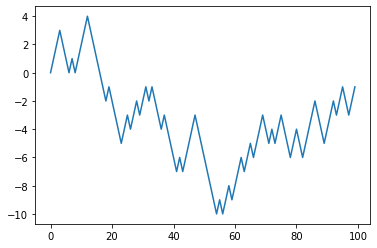

In [181]:
#plot the first 100 values on one of these random walks
plt.plot(walk[:100])

Use **np.random** module to draw 1000 coin flips at once, set these to 1 and -1, and compute the comulative sum

In [188]:
nsteps=1000
draws = np.random.randint(0,2,size=nsteps)
steps = np.where(draws>0, 1, -1)
walk = steps.cumsum()
#minimun and maximun value along walk's trayectory
walk.min(), walk.max()

(-35, 18)

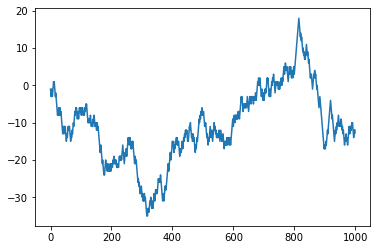

In [190]:
plt.plot(walk)

---